# EDA Case Study: Big Mart Dataset
#### -Mayank Srivastava

The Big Mart dataset contains information about
products in a store and their sales. It includes
features like Item ID, Item Weight, Item Visibility,
Item Type, Item MRP (Maximum Retail Price), Outlet
ID, Outlet Type, Outlet Location, Outlet Size, and
Item Outlet Sales.

Dataset Link:
https://drive.google.com/file/d/1rorhuEt3qdBys4MzdsLcUo76uWAwSGuD/view?usp=drive_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('BigMart.csv')
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
pd.DataFrame({'Missing val': df.isna().sum(),'Missing val %':round(df.isna().sum()*100/len(df),2)})

,Missing val,Missing val %
ProductID,0,0.00
Weight,1463,17.17
FatContent,0,0.00
ProductVisibility,0,0.00
ProductType,0,0.00
MRP,0,0.00
OutletID,0,0.00
EstablishmentYear,0,0.00
OutletSize,2410,28.28
LocationType,0,0.00


In [5]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print('-'*50)

ProductID
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
1559
--------------------------------------------------
Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17

In [6]:
#Fixing column: FatContent
df.FatContent =df.FatContent.replace(( 'low fat','LF','reg'),('Low Fat','Low Fat','Regular'))

<Axes: xlabel='Weight', ylabel='Count'>

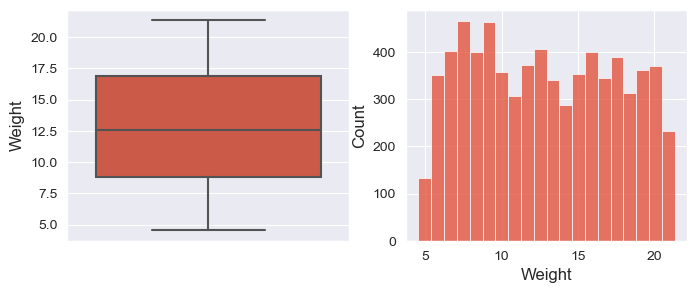

In [7]:
#Fixing Null values in column: Weight
plt.figure(figsize =(8,3))
plt.subplot(1,2,1)
sns.boxplot(y= df.Weight)

plt.subplot(1,2,2)
sns.histplot(x=df.Weight)

In [8]:
# Since, there are no outliers, we can use Mean value to impute missing values
df.Weight.fillna(df.Weight.mean(),inplace = True)

In [9]:
#Fixing Null values in column: OutletSize

#Since, its a categorical column, we can use Mode value to impute missing values
df.OutletSize.fillna(df.OutletSize.mode()[0], inplace = True)

In [10]:
# lets check the descriptive statistics 
df.describe(include ='all')


,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,5203,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.226124,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.857645,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


Observations:
   
1. The BigMart Dataset has Data of 1559 unique Product IDs
2. The most prominent Product ID is FDW13 (10 times)
3. Produtcs are divided into 2 based on their FatContent, viz., 'Low Fat' and 'Regular'
4. Products are divided into 16 ProdutType where Fruits and Vegetables is the most selling ProductType
5. MRP of the products ranges from 31.29 to 266.89
6. Weight of the products varies from 4.55 to 21.35
7. There are 10 different Outlet IDs and most prominent Outlet is OUT027
8. Outlets are divided into 3 OutletSize, viz,. Small, Medium and High
9. Outlets are distributed in 3 Location Types (Tier 1,2 and 3) and 4 Outlet Sizes (Grocery Store, Supermarket type 1,2 and 3) 
10. Most no. of outlets are of Medium Size (3 nos.) and most of the outlets are located in Tier 3 (3 nos.) Location.
11. Target column: 'Outlet Sales'. 

Above statements are only observatory and need to be confirmed from the EDA below.

### 1. How many rows and columns are there in the dataset?

In [11]:
df.shape

(8523, 12)

***There are 8523 rows and 12 columns in the dataset***

### 2. What are the different types of Outlet Types in the dataset, and how many records belong to each type?

In [12]:
pd.DataFrame(df.OutletType.value_counts()).reset_index()

,OutletType,count
0,Supermarket Type1,5577
1,Grocery Store,1083
2,Supermarket Type3,935
3,Supermarket Type2,928


***There are 4 differnet Outlet types and the count of records of each type as shown above***

### 3. What is the average Item Weight across all products?

In [13]:
round(df.Weight.mean(),2)

12.86

***There avg. of Weight acorss all products is 12.86***

### 4. Plot a histogram of Item Visibility to visualize its distribution.

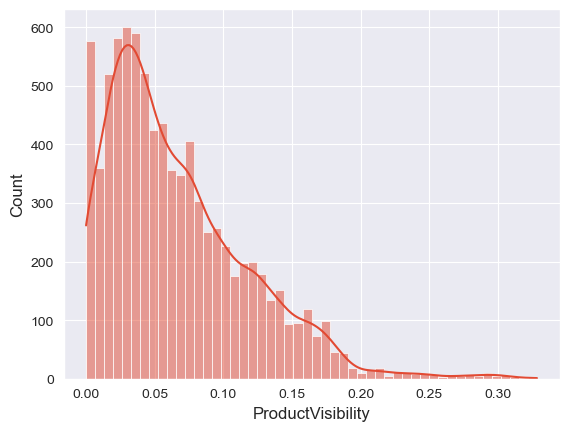

max       0.328391
mean      0.066132
median    0.053931
Name: ProductVisibility, dtype: float64

In [14]:
sns.histplot(x=df.ProductVisibility, kde= True)
plt.show()
df.ProductVisibility.aggregate(['max','mean', 'median'])

***The histplot of Item Visiblity is Right skewed, Median < Mean i.e., there are outliers on the positive side of the axis***

### 5. What is the average Item MRP (Maximum Retail Price) for each Outlet Type?

In [15]:
round(df.MRP.groupby(df.OutletType).mean(),2)

OutletType
Grocery Store        140.29
Supermarket Type1    141.21
Supermarket Type2    141.68
Supermarket Type3    139.80
Name: MRP, dtype: float64

***The Avg MRP for all the 4 Outlet types are nearly similar and are as shown above***

### 6. Which Outlet Size has the highest total Item Outlet Sales?

In [16]:
df.OutletSales.groupby(df.OutletSize).sum().astype('int').sort_values(ascending = False)

OutletSize
Medium    11882249
Small      4566212
High       2142663
Name: OutletSales, dtype: int32

***The Medium Size Outlet has the highest Outlet Sales of 11,882,249***

### 7. Identify and list the top 5 most common ItemTypes.


In [17]:
df.ProductType.value_counts().head()

ProductType
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: count, dtype: int64

***The top 5 most common ItemTypes are stated above***

### 8. Plot a box plot of Item Outlet Sales for each Outlet Size to identify potential outliers.

<Axes: xlabel='OutletSize', ylabel='OutletSales'>

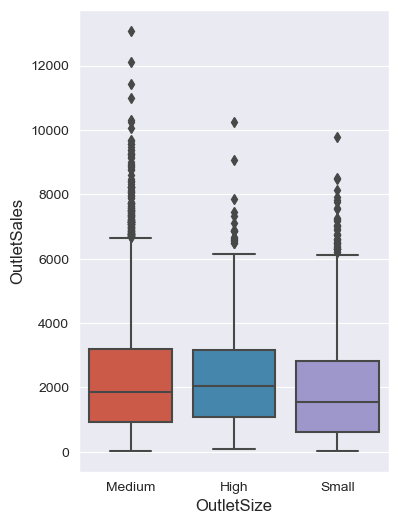

In [18]:
plt.figure(figsize = (4,6))
sns.boxplot(x= 'OutletSize', y='OutletSales', data=df)

***a. The Outliers are clearly indicated in the baove boxplots***

***b. Outlet sales above 8000 (optimum value to avoid data loss) can be considered as outlier for all Outlet Size***

### 9. Calculate the correlation between Item Weight and Item Outlet Sales.

<Axes: >

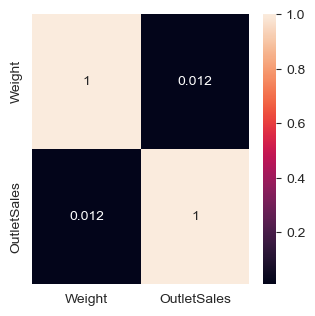

In [19]:
corr=df[['Weight','OutletSales']].corr()
plt.figure(figsize =(3.5,3.5))
sns.heatmap(corr, annot= True)

***Correlation coeff. is 0.012 which shows no correlation b/w Weight and OutletSales. The Scatter plot below further proves the claim.***

<Axes: xlabel='Weight', ylabel='OutletSales'>

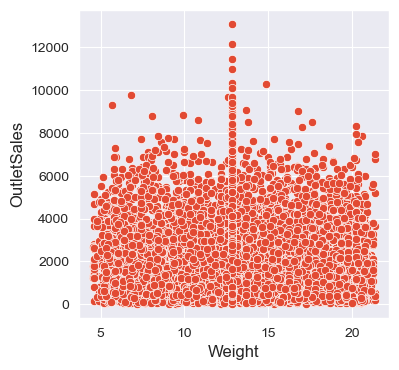

In [20]:
plt.figure(figsize =(4,4))
sns.scatterplot(x='Weight', y= 'OutletSales',data=df)

### 10. Create a pivot table showing the average Item Outlet Sales for each Outlet Type and Outlet Location.

In [21]:
data=pd.DataFrame(df.pivot(columns=['OutletType','LocationType'], values= 'OutletSales').mean()).sort_index()
data

0
OutletType        LocationType             
Grocery Store     Tier 1         340.329723
                  Tier 3         339.351662
Supermarket Type1 Tier 1        2313.099451
                  Tier 2        2323.990559
                  Tier 3        2298.995256
Supermarket Type2 Tier 3        1995.498739
Supermarket Type3 Tier 3        3694.038558

***The required pivot table has been created above.***

### Some additional Observations

<Axes: >

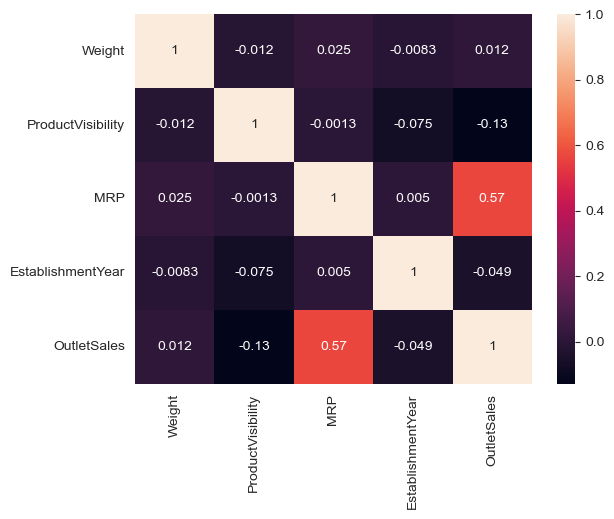

In [22]:
# correlation amongst all numeric columns
# depicting it through heatmap

corr=df.corr(numeric_only= True)
sns.heatmap(corr, annot = True)

***Correlation coeff of 0.57 b/w MRP an Outlet Sales shows a postive relation b/w both columns***

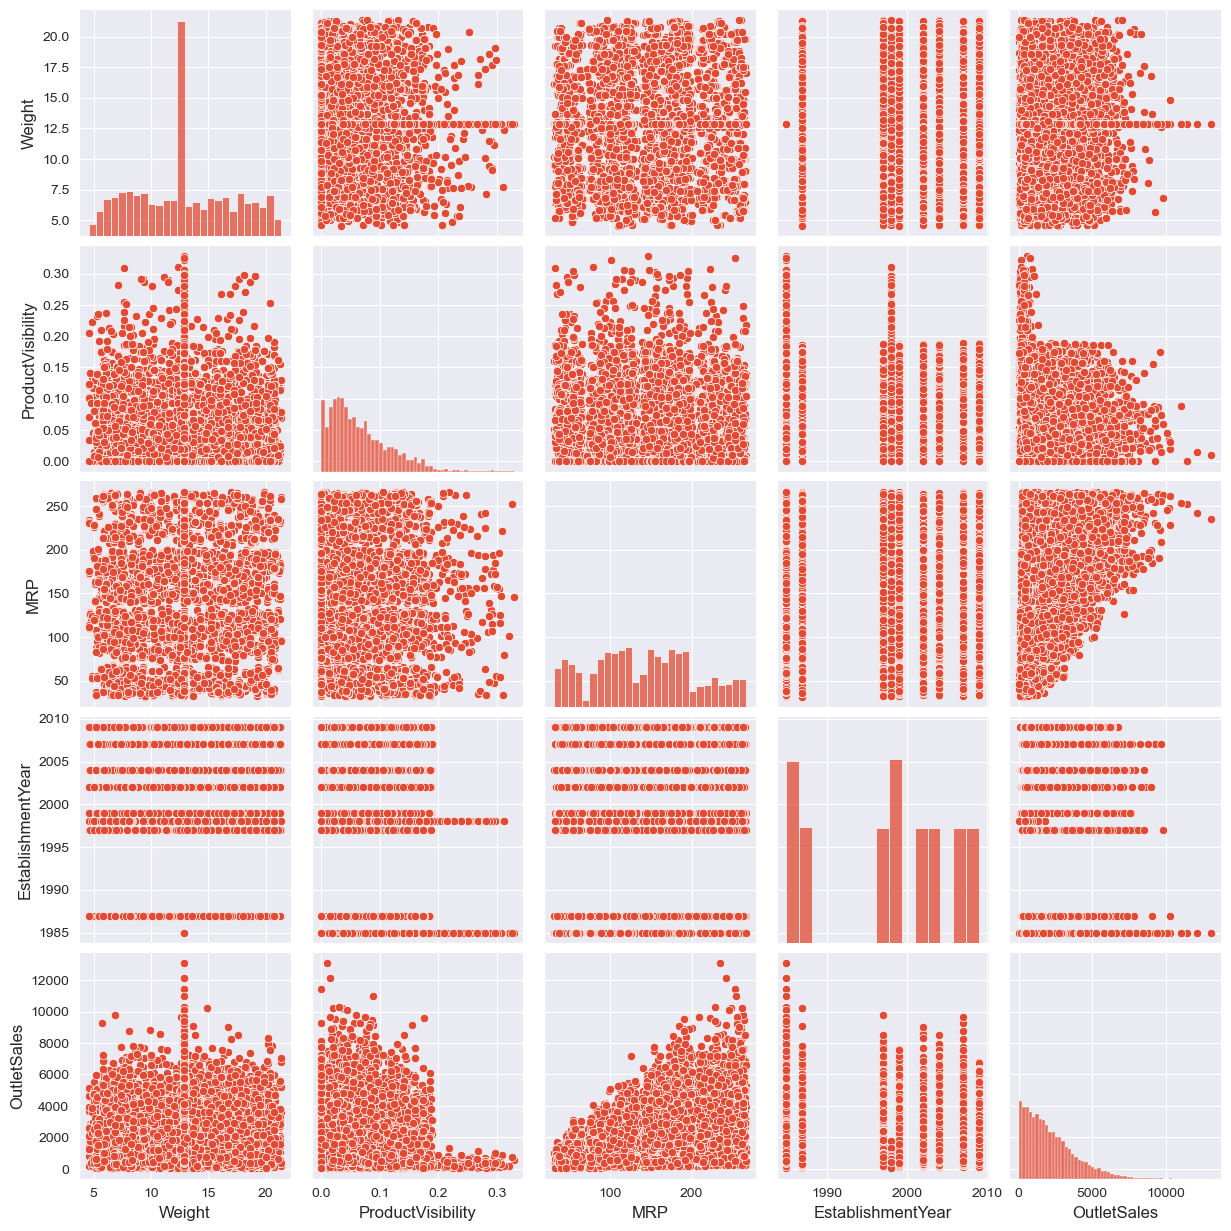

In [23]:
# pairplot of numerical values

sns.pairplot(data=df.select_dtypes(exclude ='object') )

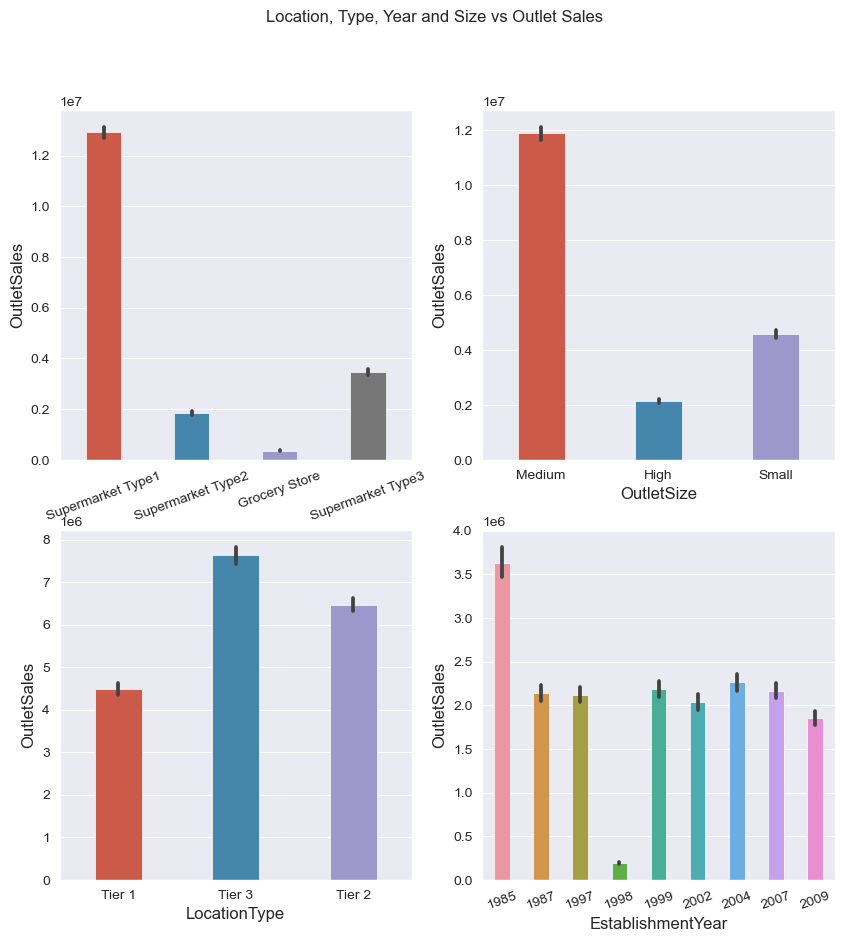

In [24]:
#Item Outlet Sales vs Fat Content

plt.figure(figsize =(10,10))

plt.subplot(2,2,1)
sns.barplot(x='OutletType', y='OutletSales', data= df, estimator='sum',width =0.4)
plt.xticks(rotation =20)
plt.xlabel('')
plt.subplot(2,2,2)
sns.barplot(x='OutletSize', y='OutletSales', data= df, estimator='sum', width =0.4)
plt.subplot(2,2,3)
sns.barplot(x='LocationType', y='OutletSales', data= df, estimator='sum',width =0.4)
plt.subplot(2,2,4)
sns.barplot(x='EstablishmentYear', y='OutletSales', data= df, estimator='sum',width =0.4)
plt.xticks(rotation =20)
plt.suptitle('Location, Type, Year and Size vs Outlet Sales')
plt.show()

Observations:

1. Maximum sales is reocrded from Outlet type: Super market type 1
2. Maximum sales is recorded from Outlet size: Medium
3. Maximum sales is recorded from Outlet Location: Tier 3
4. Maximum sales is recorded from Outlets estalished in 1985

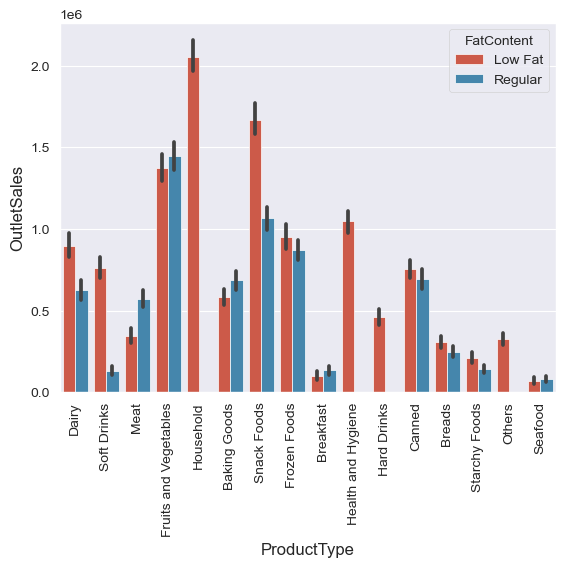

In [25]:
sns.barplot(x='ProductType', y='OutletSales', data=df, hue='FatContent', estimator ='sum' )
plt.xticks(rotation =90)
plt.show()

Total Sales value: 18591125.410400037


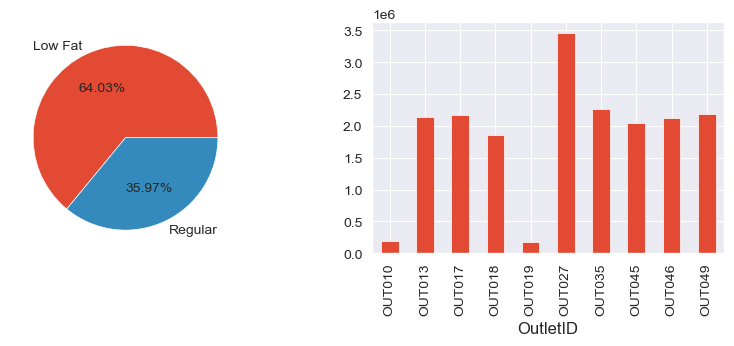

In [26]:
# Find the total Sales value and plot pie chart of Sales by FatContent
# find the highest selling 'Regular' and 'Low Fat' product
# find outlet wise total sales value
print('Total Sales value:',sum(df.OutletSales))


# for pie chart
plt.figure(figsize =(10,3))
data= df.OutletSales.groupby(df.FatContent).sum()

plt.subplot(1,2,1)
plt.pie(x=data, labels= data.index, autopct='%0.2f%%')

plt.subplot(1,2,2)
data=df.groupby('OutletID')['OutletSales'].sum().plot(kind='bar', width=0.5)

plt.show()

In [27]:
reg=df[df.FatContent=='Regular']['OutletSales'].groupby(df.ProductType).sum()
print(f"under 'Regular' catgeory, maximum selling product is: {reg.idxmax()} and its total sales is: {round(reg.max(),2)}")
lf=df[df.FatContent=='Low Fat']['OutletSales'].groupby(df.ProductType).sum()
print(f"under 'Low Fat' catgeory, maximum selling product is: {lf.idxmax()} and its total sales is: {round(lf.max(),2)}")


under 'Regular' catgeory, maximum selling product is: Fruits and Vegetables and its total sales is: 1445144.2
under 'Low Fat' catgeory, maximum selling product is: Household and its total sales is: 2055493.71


Observations:
1. OUT027 has recorded highest sales amongst all Outlets
2. 'Low Fat' contributes to 64% while 'Regular fat' contributes to 36% of Big Mart sales
3. Total Sales Value in BigMart is 18,591,125.41

### Let's start Pre-processing for Machine Learning 

In [28]:
# removing unnecessary columns
df.drop('ProductID', axis =1, inplace = True)

In [29]:
# Encoding the data
cols= df.select_dtypes(include ='object').columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cols:
    df[i]=le.fit_transform(df[i])

df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [30]:
# splitting x & y
x= df.drop('OutletSales', axis =1)
y=df.OutletSales

In [31]:
# Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

x=mms.fit_transform(x)


In [32]:
#Dividing dataset for train and test in 80-20 ratio

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size =0.2)

#checking sizes
x_train.shape, x_test.shape

((6818, 10), (1705, 10))

In [33]:
# Applying Linear Regression ML model

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([2468.41598881, 2503.10642292, 1821.14459086, ..., 3853.46663474,
       -460.58846871, 5364.6682111 ])

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'r2 score {r2_score(y_test, y_predict)}')
print(f'MAE {mean_absolute_error(y_test, y_predict)}')
print(f'MSE {mean_squared_error(y_test, y_predict)}')
print(f'Training Accuracy {model.score(x_train, y_train)}')

r2 score 0.5129854514310275
MAE 910.2743255731172
MSE 1425423.1351515895
Training Accuracy 0.5096238829040254


# -------------------------------------End of Report------------------------------------------------------